###*Sayantan Mukherjee 60009220131 D2-2*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


###*linear Auto Encoder*

In [3]:
def build_linear_autoencoder():
    model = Sequential([
        Input(shape=(4,)),
        Dense(3),
        Dense(4)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

linear_autoencoder = build_linear_autoencoder()


###*Sigmoid based Non-linear Auto Encoder*

In [4]:
def build_sigmoid_autoencoder():
    model = Sequential([
        Input(shape=(4,)),
        Dense(3, activation='sigmoid'),
        Dense(4, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

sigmoid_autoencoder = build_sigmoid_autoencoder()


###*ReLU based Non-Linear Auto Encoder*

In [5]:
def build_relu_autoencoder():
    model = Sequential([
        Input(shape=(4,)),
        Dense(3, activation='relu'),
        Dense(4, activation='relu')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

relu_autoencoder = build_relu_autoencoder()


###*Training*

In [6]:
epochs = 50
batch_size = 16

history_linear = linear_autoencoder.fit(X_scaled, X_scaled, epochs=epochs, batch_size=batch_size, verbose=0)
history_sigmoid = sigmoid_autoencoder.fit(X_scaled, X_scaled, epochs=epochs, batch_size=batch_size, verbose=0)
history_relu = relu_autoencoder.fit(X_scaled, X_scaled, epochs=epochs, batch_size=batch_size, verbose=0)


###*Using PCA as Encoder*

In [7]:
pca = PCA(n_components=3)
X_pca_encoded = pca.fit_transform(X_scaled)


In [8]:
# Encoded output from the middle (dense) layer of each autoencoder
encoder_linear = Sequential([linear_autoencoder.layers[0]])
X_encoded_linear = encoder_linear.predict(X_scaled)

encoder_sigmoid = Sequential([sigmoid_autoencoder.layers[0]])
X_encoded_sigmoid = encoder_sigmoid.predict(X_scaled)

encoder_relu = Sequential([relu_autoencoder.layers[0]])
X_encoded_relu = encoder_relu.predict(X_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


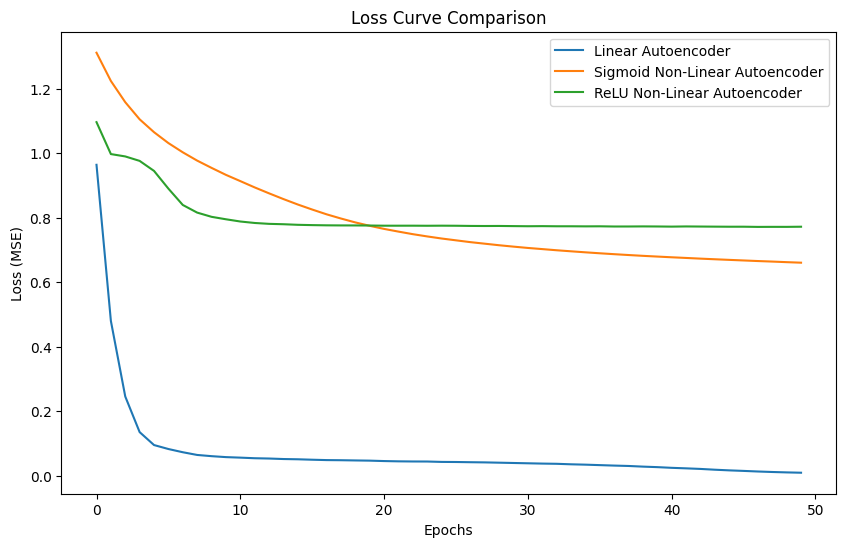

In [9]:
plt.figure(figsize=(10, 6))

#Linear Autoencoder loss
plt.plot(history_linear.history['loss'], label='Linear Autoencoder')

#Sigmoid Non-Linear Autoencoder loss
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Non-Linear Autoencoder')

#ReLU Non-Linear Autoencoder loss
plt.plot(history_relu.history['loss'], label='ReLU Non-Linear Autoencoder')

plt.title('Loss Curve Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


###*Conclusion*

1-Linear Autoencoder: Basic autoencoder with no activation function.

2-Sigmoid-based Autoencoder: Introduced non-linearity using Sigmoid activation.

3-ReLU-based Autoencoder: Another non-linear encoder using ReLU activation.

Trained each Autoencoder for 50 epochs to minimize reconstruction loss (MSE) by mapping inputs back to their original shape.

Compared with PCA by encoding the input data using a 3-component PCA, as it provides a linear compression benchmark.

Encoded the input data using the middle layers of the trained autoencoders for analysis.

Plotted Loss Curves for each autoencoder to visualize how well they learn and reconstruct the input data over time.
